<a href="https://colab.research.google.com/github/75hzzz/oss2025/blob/main/%EA%B5%AD%EA%B0%80%EB%B3%84_%EC%97%90%EB%84%88%EC%A7%80_%EC%82%AC%EC%9A%A9%EB%9F%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#국가별 총 에너지 소비량

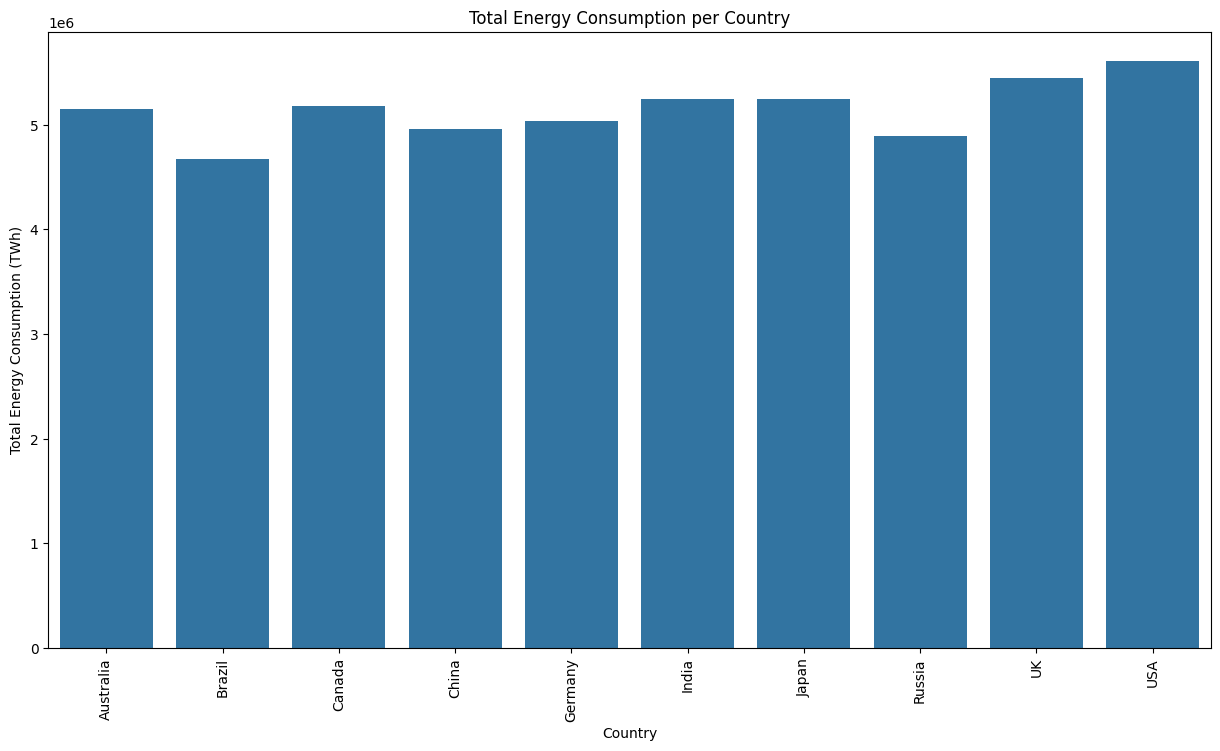

Country
USA          5605610.41
UK           5441090.17
Japan        5247813.17
India        5245804.66
Canada       5172891.87
Australia    5152208.06
Germany      5034206.46
China        4961115.16
Russia       4891477.20
Brazil       4673427.09
Name: Total Energy Consumption (TWh), dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/global_energy_consumption.csv')

# 국가별 총 에너지 소비량 계산
country_energy = df.groupby('Country')['Total Energy Consumption (TWh)'].sum()

# 그래프 생성
plt.figure(figsize=(15, 8))
sns.barplot(x=country_energy.index, y=country_energy.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total Energy Consumption (TWh)')
plt.title('Total Energy Consumption per Country')
plt.show()


# 표 생성
print(country_energy.sort_values(ascending=False))


#총 에너지 소비량과 석유 의존도

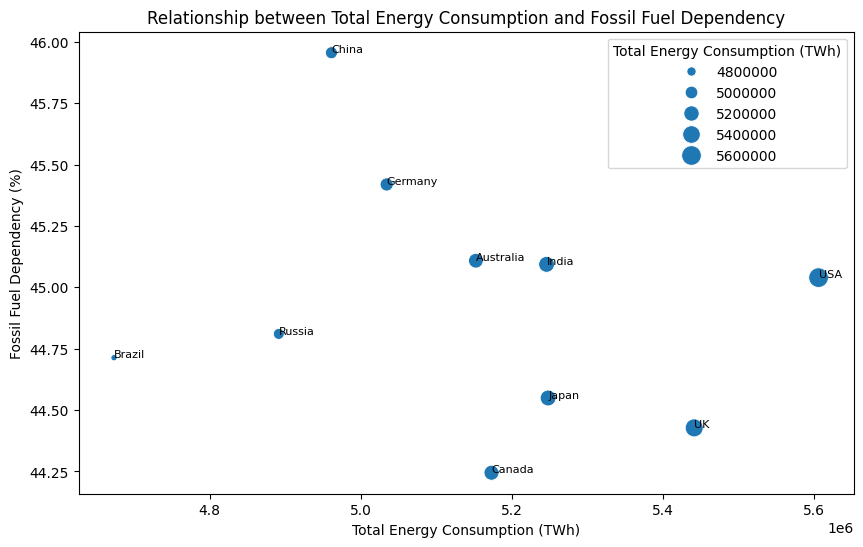

,Fossil Fuel Dependency (%),Total Energy Consumption (TWh)
Country,,
USA,45.039801,5605610.41
UK,44.427611,5441090.17
Japan,44.549386,5247813.17
India,45.093825,5245804.66
Canada,44.244936,5172891.87
Australia,45.108668,5152208.06
Germany,45.419351,5034206.46
China,45.955939,4961115.16
Russia,44.810403,4891477.20


In [17]:
# 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/global_energy_consumption.csv')

# 국가별 화석연료 의존도와 총 에너지 소비량 계산
country_data = df.groupby('Country').agg({'Fossil Fuel Dependency (%)': 'mean', 'Total Energy Consumption (TWh)': 'sum'})

# 화석연료 의존도와 총 에너지 소비량의 관계 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Energy Consumption (TWh)', y='Fossil Fuel Dependency (%)', data=country_data, size=country_data['Total Energy Consumption (TWh)'], sizes=(20, 200))
plt.xlabel('Total Energy Consumption (TWh)')
plt.ylabel('Fossil Fuel Dependency (%)')
plt.title('Relationship between Total Energy Consumption and Fossil Fuel Dependency')
for i in range(country_data.shape[0]):
    plt.text(x=country_data['Total Energy Consumption (TWh)'].iloc[i] + 0.1, y=country_data['Fossil Fuel Dependency (%)'].iloc[i], s=country_data.index[i], fontsize=8, horizontalalignment='left')
plt.show()

# 상위 10개 국가 출력 (총 에너지 소비량 기준)
top_10_countries = country_data.sort_values(by='Total Energy Consumption (TWh)', ascending=False).head(10)
top_10_countries
